## Problem Statement

### We have a data which contains detail about customer bank relationship.

**Our object is to build a model and predict wheather the average balance of the customer will fall below the minimum balance in the consicutive month or not.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("churn_prediction_simple.csv")
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0


In [4]:
data.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

In [6]:
data.info()
# Column churn is the target variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22067 entries, 0 to 22066
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     22067 non-null  int64  
 1   vintage                         22067 non-null  int64  
 2   age                             22067 non-null  int64  
 3   gender                          22067 non-null  int64  
 4   dependents                      22067 non-null  float64
 5   occupation                      22067 non-null  int64  
 6   city                            22067 non-null  float64
 7   customer_nw_category            22067 non-null  int64  
 8   branch_code                     22067 non-null  int64  
 9   days_since_last_transaction     22067 non-null  float64
 10  current_balance                 22067 non-null  float64
 11  previous_month_end_balance      22067 non-null  float64
 12  average_monthly_balance_prevQ   

In [9]:
data['churn'].value_counts()/len(data)

0    0.806317
1    0.193683
Name: churn, dtype: float64

**It is a logistic regression model therefore it is divided into class-0 and class-1**

Here class-0 is 80% and class-1 is 20% hence data is imbalance.

In [10]:
X = data.drop(columns = ["churn","customer_id"])
Y = data["churn"]

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [20]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test,Y_train ,Y_test = tts(scaled_X, Y,train_size=0.80,stratify=Y)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((17653, 19), (4414, 19), (17653,), (4414,))

In [68]:
scaled_X

array([[ 0.36776943,  1.10221897, -0.80262961, ..., -0.14777343,
        -0.29131276, -0.27285206],
       [-0.01005188, -0.36182226, -0.80262961, ..., -0.0866856 ,
        -0.30670662, -0.26243794],
       [-1.42875841, -0.36182226,  1.2459047 , ..., -0.13641792,
         0.43666083,  0.38937211],
       ...,
       [ 1.48371848, -0.84983601,  1.2459047 , ..., -0.10749986,
        -0.1749333 , -0.16646506],
       [-1.40749032, -0.05681367, -0.80262961, ..., -0.14492929,
         2.75212419,  2.40185319],
       [-0.1238987 , -1.8258635 , -0.80262961, ..., -0.10432125,
        -0.24312858, -0.18695195]])

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(class_weight='balanced')

In [22]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(class_weight='balanced')

**class_weight='balanced' :** Balanced weight will add a multiplier to the minority class 1, hence error can not be negleted for minority class. It is very helpful incase of imbalanced datset.
Since in our case 80% of the data belong to class 0 and 20% of the data belong to class 1. As a result most of the error will occur due to class 0 as a result the model will ignore the errors casued by the class 1.

In [24]:
classifier.fit(X_train,Y_train)

LogisticRegression(class_weight='balanced')

In [85]:
classifier.coef_

array([[-0.17675867, -0.09206565, -0.05599742,  0.03086235, -0.10014947,
         0.01298324,  0.02860569,  0.00359134, -0.13025419, -2.54703064,
        -0.17412901,  1.58573056, -0.03900526, -0.24754111, -0.09758308,
         0.86036673,  0.49029277,  0.74257197,  0.08356712]])

In [30]:
predicted_values = classifier.predict(X_test)  # predicted class
predicted_values
predicted_values.shape

(4414,)

In [29]:
predicted_probability  = classifier.predict_proba(X_test)  # predicted probability 
predicted_probability,predicted_probability .shape

(array([[0.54142926, 0.45857074],
        [0.48761088, 0.51238912],
        [0.49823156, 0.50176844],
        ...,
        [0.43623786, 0.56376214],
        [0.58533294, 0.41466706],
        [0.40693631, 0.59306369]]),
 (4414, 2))

Here first columns represent the probability with class 0 and second column with class 1.

## Confusion Matrix
- Evaluating Logistic Regresssion using evaluation metrics

In [31]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(Y_test,predicted_values)
cf

array([[2625,  934],
       [ 293,  562]], dtype=int64)

In [32]:
# Accuracy
classifier.score(X_test,Y_test)

0.722020842772995

It is showing a good accuracy, but data is imbalance therefore we must check precision and recall

In [33]:
# Precision
from sklearn.metrics import precision_score as ps
Precision = ps(Y_test,predicted_values)
Precision

0.37566844919786097

Conclusion: the predictions contains high percentage of false positives(FP).

In [34]:
# Recall
from sklearn.metrics import recall_score
Recall = recall_score(Y_test,predicted_values)
Recall

0.6573099415204678

Conclusion: Out of overall positive person only 64% have been predict positive.


**If we are not sure about what to choose, then we must look for the F1 score.**


In [35]:
f1 = 2/((1/Precision)+(1/Recall))
f1

0.47809442790302004

In [36]:
from sklearn.metrics import f1_score
F1 = f1_score(Y_test,predicted_values)
F1

0.47809442790302004

**Calculating precision, recall , f1-score and support at once**

Support: It is nothing but the number of instances for the class 1 and class 0.

In [37]:
from sklearn.metrics import precision_recall_fscore_support as PRF_summary
precision,recall,f1,support = PRF_summary(Y_test,predicted_values)

In [38]:
precision

array([0.89958876, 0.37566845])

In [39]:
recall

array([0.73756673, 0.65730994])

In [42]:
f1

array([0.81056044, 0.47809443])

In [40]:
support

array([3559,  855], dtype=int64)

It is showing 2 values because first one is of class:0 and second one is for class:1

In [43]:
# Another method for the same

from sklearn.metrics import classification_report
k = classification_report(Y_test,predicted_values)
print(k)

              precision    recall  f1-score   support

           0       0.90      0.74      0.81      3559
           1       0.38      0.66      0.48       855

    accuracy                           0.72      4414
   macro avg       0.64      0.70      0.64      4414
weighted avg       0.80      0.72      0.75      4414



Drawback: This function is meant for representation purpose only , we cannot use its value.

In [44]:
from sklearn.metrics import precision_recall_curve
precision_points,recall_points,threshold_points = precision_recall_curve(Y_test,predicted_probability[:,1])
precision_points.shape,recall_points.shape,threshold_points.shape

((4415,), (4415,), (4414,))

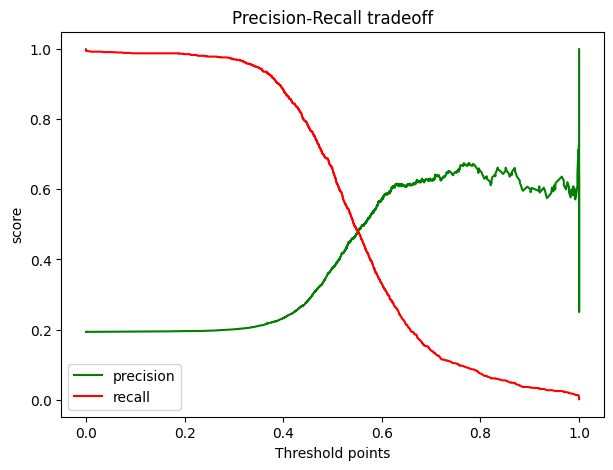

In [45]:
plt.figure(figsize=(7,5),dpi=100)
plt.plot(threshold_points,precision_points[:-1],color="green",label='precision')
plt.plot(threshold_points,recall_points[:-1],color="red",label='recall')
plt.xlabel('Threshold points')
plt.ylabel("score")
plt.title("Precision-Recall tradeoff")
plt.legend()
plt.show()

- As we increase precision, we decrease recall and vice-versa.

## AUC-ROC Curve

In [46]:
from sklearn.metrics import roc_curve , roc_auc_score
fpr, tpr, threshold = roc_curve(Y_test,predicted_probability[:,1])

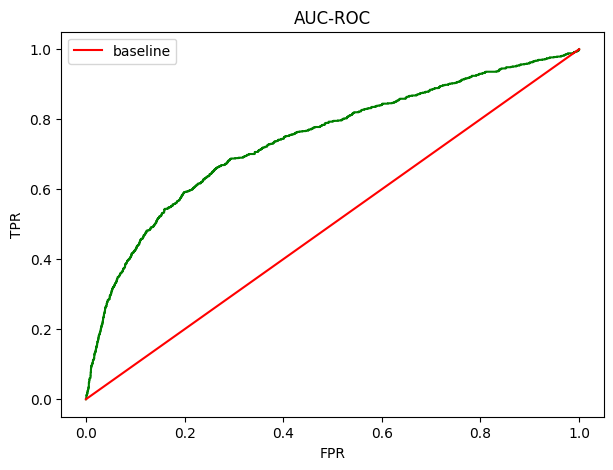

0.7415326271095928

In [57]:
plt.figure(figsize=(7,5),dpi=100)
plt.plot(fpr,tpr,color="green")
plt.plot([0,1],[0,1],label='baseline',color='red')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC-ROC")
plt.legend()
plt.show()
roc_auc_score(Y_test,predicted_probability[:,1])  # area

### Coefficient Plot

In [98]:
coefficients_table = pd.DataFrame({
    "columns":X.columns,
    "coefficients":classifier.coef_.reshape(-1)
})
coefficients_table = coefficients_table.sort_values(by='coefficients')

In [99]:
coefficients_table

,columns,coefficients
9,current_balance,-2.547031
13,current_month_credit,-0.247541
0,vintage,-0.176759
10,previous_month_end_balance,-0.174129
8,days_since_last_transaction,-0.130254
4,occupation,-0.100149
14,previous_month_credit,-0.097583
1,age,-0.092066
2,gender,-0.055997
12,average_monthly_balance_prevQ2,-0.039005


Text(0.5, 1.0, 'Coefficient plot')

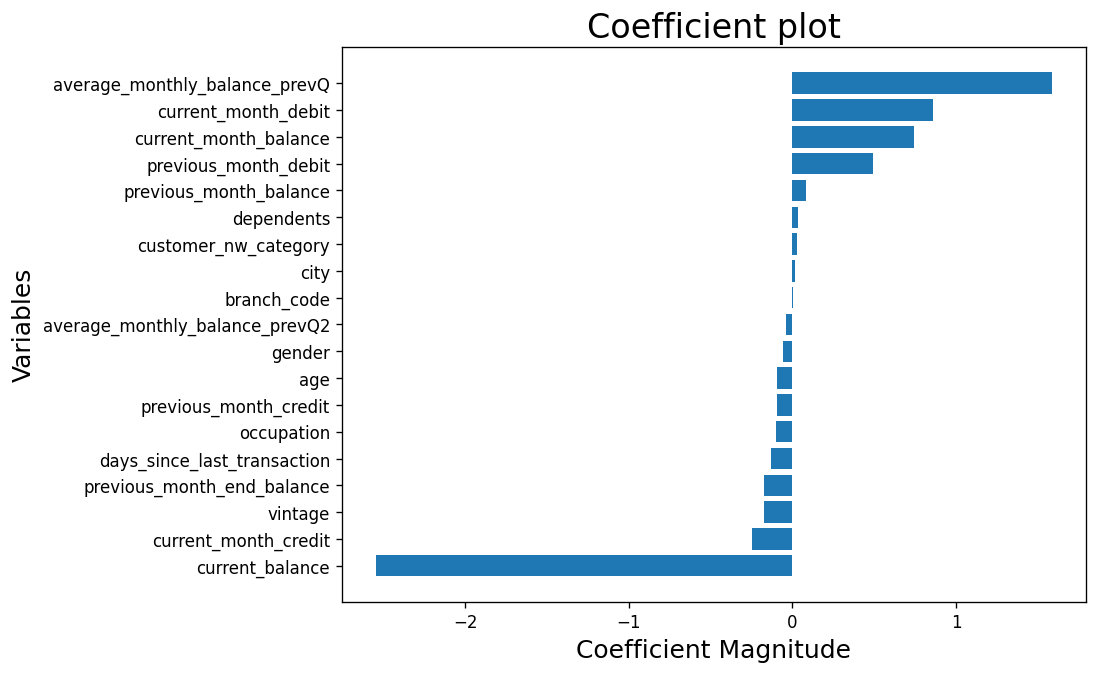

In [104]:
plt.figure(figsize=(8, 6), dpi=120)
plt.barh( coefficients_table['columns'] , coefficients_table['coefficients'] )
plt.xlabel( "Coefficient Magnitude", fontsize = 15)
plt.ylabel('Variables', fontsize = 15)
plt.title('Coefficient plot', fontsize = 20)

In [105]:
X.columns

Index(['vintage', 'age', 'gender', 'dependents', 'occupation', 'city',
       'customer_nw_category', 'branch_code', 'days_since_last_transaction',
       'current_balance', 'previous_month_end_balance',
       'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2',
       'current_month_credit', 'previous_month_credit', 'current_month_debit',
       'previous_month_debit', 'current_month_balance',
       'previous_month_balance'],
      dtype='object')

- Average_monthly_balance_prevQ, Current_month_debit, Previous_month_debit, Current_month_balance
  worked in favour of class 1 ,i.e **higher** these values more likely the customer will churn.
  i.e, the number of customers who fail to become repeat customers.
- Current_Balance , Current_Month_Credit: worked in favour of class 0, i.e **higher** these numbers less likely the customers will churn.